In [ ]:
import os
import pandas as pd

# Set directory
#os.chdir("C:\Users\ENTERUSERNAME/Project/Project 3 - Bike Friendliness")

# Reading Excel files and importing them as DataFrames
january_2023 = pd.read_excel("january-2023.xlsx")
february_2023 = pd.read_excel("february-2023.xlsx")
march_2023 = pd.read_excel("march-2023.xlsx")
april_2023 = pd.read_excel("april_2023.xlsx")
may_2023 = pd.read_excel("may-2023.xlsx")
june_2023 = pd.read_excel("june-2023.xlsx")
july_2023 = pd.read_excel("july-2023.xlsx")
august_2023 = pd.read_excel("august-2023.xlsx")
september_2023 = pd.read_excel("september-2023.xlsx")
october_2023 = pd.read_excel("october-2023.xlsx")
november_2022 = pd.read_excel("november-2022.xlsx")
december_2022 = pd.read_excel("december-2022.xlsx")

# Data Cleaning
all_data = pd.concat([
    january_2023, february_2023, march_2023, april_2023, may_2023, june_2023,
    july_2023, august_2023, september_2023, october_2023, november_2022, december_2022
])

# Limiting "Closed Status" column to only "Normal"
all_data = all_data[all_data['Closed Status'] == "NORMAL"]

# Finding all different types of Closed Status to check code above
closed_status_types = all_data['Closed Status'].unique()
print(closed_status_types)

# General Data Analysis
# Finding the Average Duration of all rides (Seconds)
average_duration = all_data['Duration'].mean()

# Changing Average Duration to Minutes
average_duration /= 60
print(average_duration)

# New DataFrame with average duration from Start and End locations of each trip
route_traveled_average_time = all_data[[
    'Start Station Id', 'Start Station Name', 'End Station Id', 'End Station Name', 'Duration'
]]

# Finding the number of trips between two unique stations
route_traveled_average_time = route_traveled_average_time.groupby(
    ['Start Station Id', 'Start Station Name', 'End Station Id', 'End Station Name']
).agg(
    {'Duration': 'mean', 'Start Station Id': 'count'}
).rename(columns={'Duration': 'Average Route Duration', 'Start Station Id': 'Number of Trips'})

# Changing Duration to Minutes from Seconds
route_traveled_average_time['Average Route Duration'] /= 60

# Percentage of Type of Rider
percentage_data = all_data['Rider Type'].value_counts(normalize=True) * 100
print(percentage_data)

# Analyzing not NORMAL data
# Combine all dataframes into a new single dataframe
all_data_canceled = pd.concat([
    january_2023, february_2023, march_2023, april_2023, may_2023, june_2023,
    july_2023, august_2023, september_2023, october_2023, november_2022, december_2022
])

# Remove all rows except GRACE_PERIOD value in the Closed Status column
data_relocked = all_data_canceled[all_data_canceled['Closed Status'] == "GRACE_PERIOD"]

# Average amount of time lost from GRACE_PERIOD
average_time = data_relocked['Duration'].mean()

# Changing Average_Time to Minutes
average_time /= 60
print(average_time)

# Amount of time lost from GRACE_PERIOD
total_time = data_relocked['Duration'].sum()

# Changing Average Duration to Minutes
total_time /= 60
print(total_time)

# Remove all rows except FORCED_CLOSED value in the Closed Status column
data_force_cancelled = all_data_canceled[all_data_canceled['Closed Status'] == "FORCED_CLOSED"]

# Remove all rows except TERMINATED value in the Closed Status column
data_cancelled = all_data_canceled[all_data_canceled['Closed Status'] == "TERMINATED"]

# Total Number of Trips
total_number_trips = route_traveled_average_time['Number of Trips'].sum()
print(total_number_trips)


In [ ]:
# Initiate Packages

import pandas as pd
import numpy as np
import os
import re
import math
import matplotlib.pyplot as plt

# Read in data

november = pd.read_excel("november-2022.xlsx")
december = pd.read_excel("december-2022.xlsx")
january = pd.read_excel("january-2023.xlsx")
february = pd.read_excel("february-2023.xlsx")
march = pd.read_excel("march-2023.xlsx")
april = pd.read_csv("pogho-trip-data-2023-04.csv")
may = pd.read_excel("may-2023.xlsx")
june = pd.read_excel("june-2023.xlsx")
july = pd.read_excel("july-2023.xlsx")
august = pd.read_excel("august-2023.xlsx")
september = pd.read_excel("september-2023.xlsx")
october = pd.read_excel("october-2023.xlsx")

print(october.head(10))

# Reformat April data
april = april.rename(columns = {"Closed.Status" : "Closed Status", "Start.Station.Id" : "Start Station Id",
               "Start.Date" : "Start Date", "Start.Station.Name" : "Start Station Name",
               "End.Date" : "End Date", "End.Station.Id" : "End Station Id",
               "End.Station.Name" : "End Station Name", "Rider.Type" : "Rider Type"})
print(april.head(10))

# Create columns identifying month

november["Month"] = "November"
december["Month"] = "December"
january["Month"] = "January"
february["Month"] = "February"
march["Month"] = "March"
april["Month"] = "April"
may["Month"] = "May"
june["Month"] = "June"
july["Month"] = "July"
august["Month"] = "August"
september["Month"] = "September"
october["Month"] = "October"

# Merge dataframes into an aggregate, year-to-date dataframe

yeardata = pd.concat([november, december, january, february, march, april, may,
                     june, july, august, september, october])
print(yeardata.shape)

# Grouping by 'Start Station Id' and calculating the sum of 'ones'
yeardata["ones"] = 1
startstationids = yeardata.groupby('Start Station Id')['ones'].sum().reset_index(name='Total')
endstationids = yeardata.groupby('End Station Id')['ones'].sum().reset_index(name='Total')
print(startstationids.head(10))

print(endstationids.head(10))

# Find median duration per station
stat_start_duration = yeardata.groupby('Start Station Id')['Duration'].median().reset_index(name='MedDuration')
stat_end_duration = yeardata.groupby('End Station Id')['Duration'].median().reset_index(name='MedDuration')
print(stat_start_duration.head(10))

# Identify Locations for Mapping
locations = pd.read_excel("pogoh-station-locations-october-2023.xlsx")
locations.head(10)

# Identify most common routes
route = yeardata.groupby(['Start Station Id', 'End Station Id'])['ones'].sum().reset_index(name='TotalRoutes')
route = route.sort_values(by='TotalRoutes', ascending=False)
route.head(10)

# Find average distance between a station and all other stations
distvec = []
avgdistvec = []
for i in range(len(locations)):
    for j in range(len(locations)):
        if i != j:
            mydist = math.acos(math.sin(locations['Latitude'][i] * (math.pi / 180)) * math.sin(locations['Latitude'][j] * (math.pi / 180)) +
                               math.cos(locations['Latitude'][i] * (math.pi / 180)) * math.cos(locations['Latitude'][j] * (math.pi / 180)) *
                               math.cos((locations['Longitude'][j] - locations['Longitude'][i]) * (math.pi / 180))) * 6371
            distvec.append(mydist)
    avgdist = np.mean(distvec)
    avgdistvec.append(avgdist)
    distvec = []

startstationids['AvgDistance'] = avgdistvec
endstationids = endstationids.iloc[:60]  # Omit an entry that had NA values
endstationids['AvgDistance'] = avgdistvec
startstationids.head(10)

# Discover Relationship between Average Distance and Dispatches
start_corr = np.corrcoef(startstationids['AvgDistance'], startstationids['Total'])[0, 1]
print(start_corr)

# Discover Relationship between Dispatches and Average Distance to all other stations
plt.scatter(startstationids['AvgDistance'], startstationids['Total'])
plt.title('Dispatches vs. Average Distance to All Other Stations')
plt.xlabel('Average Distance (km)')
plt.ylabel('Total Dispatches')
plt.show()

plt.scatter(endstationids['AvgDistance'], endstationids['Total'])
plt.title('Dispatches vs. Average Distance to All Other Stations')
plt.xlabel('Average Distance (km)')
plt.ylabel('Total Dispatches')
plt.show()

# Is there an exponential relationship?
plt.scatter(startstationids['AvgDistance'], np.log(startstationids['Total']))
plt.title('Log(Dispatches) vs. Average Distance to All Other Stations')
plt.xlabel('Average Distance (km)')
plt.ylabel('Log of Total Dispatches')
plt.show()


log_corr = np.corrcoef(startstationids['AvgDistance'], np.log(startstationids['Total']))[0, 1]
print(log_corr)

In [ ]:
import pandas as pd

# Load the Excel and CSV files
november = pd.read_excel("november-2022.xlsx")
december = pd.read_excel("december-2022.xlsx")
january = pd.read_excel("january-2023.xlsx")
february = pd.read_excel("february-2023.xlsx")
march = pd.read_excel("march-2023.xlsx")
april = pd.read_csv("pogho-trip-data-2023-04.csv")
may = pd.read_excel("may-2023.xlsx")
june = pd.read_excel("june-2023.xlsx")
july = pd.read_excel("july-2023.xlsx")
august = pd.read_excel("august-2023.xlsx")
september = pd.read_excel("september-2023.xlsx")
october = pd.read_excel("october-2023.xlsx")

# Combine all the dataframes into one
combined_df = pd.concat([november, december, january, february, march, april, may, june, july, august, september, october])

# Save the combined dataframe to a new Excel file
combined_df.to_excel("yeararound_bike_data.xlsx", index=False)


C:\Users\28367\AppData\Local\Temp\ipykernel_1420\611568382.py:8: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  bike_usage_df = pd.read_excel('yeararound_bike_data.xlsx')  # 请替换为实际文件路径


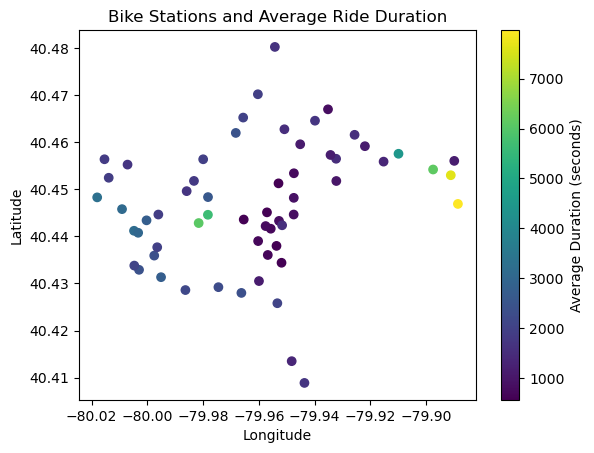

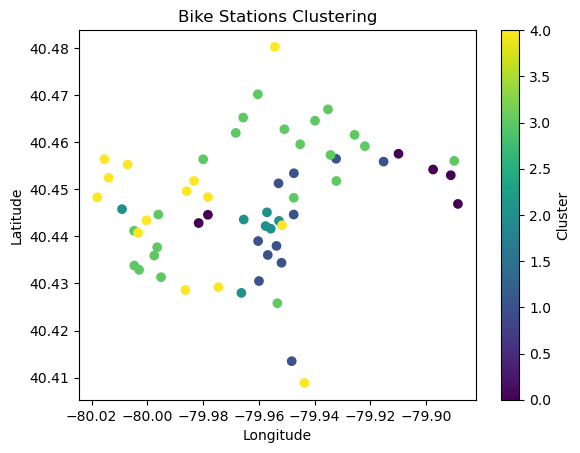

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 读取数据
bike_usage_df = pd.read_excel('yeararound_bike_data.xlsx')  # 请替换为实际文件路径
bike_lanes_df = pd.read_csv('NOAH bike lane.csv')  # 请替换为实际文件路径
bike_stations_df = pd.read_excel('pogoh-station-locations-october-2023.xlsx')  # 请替换为实际文件路径

# 数据清洗
# 转换日期格式
bike_usage_df['Start Date'] = pd.to_datetime(bike_usage_df['Start Date'])
bike_usage_df['End Date'] = pd.to_datetime(bike_usage_df['End Date'])

# 填充空值，这里假设没有空值，如果有的话需要填充或删除
# bike_usage_df.fillna(method='ffill', inplace=True)

# 统计分析
# 计算每个站点的平均骑行时长
avg_duration_per_station = bike_usage_df.groupby('Start Station Name')['Duration'].mean().reset_index()

# 合并自行车站点数据
stations_with_docks = pd.merge(bike_stations_df, avg_duration_per_station, 
                               left_on='Name', right_on='Start Station Name', how='left')

# 可视化自行车站点和平均骑行时间
plt.scatter(stations_with_docks['Longitude'], stations_with_docks['Latitude'], 
            c=stations_with_docks['Duration'], cmap='viridis')
plt.colorbar(label='Average Duration (seconds)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bike Stations and Average Ride Duration')
plt.show()

# 如果需要进行更复杂的分析，比如聚类分析来找出类似的邻里
# 标准化数据
scaler = StandardScaler()
stations_scaled = scaler.fit_transform(stations_with_docks[['Total Docks', 'Duration']])

# 运行KMeans聚类
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(stations_scaled)
stations_with_docks['Cluster'] = clusters

# 可视化聚类结果
plt.scatter(stations_with_docks['Longitude'], stations_with_docks['Latitude'], 
            c=stations_with_docks['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bike Stations Clustering')
plt.show()


C:\Users\28367\AppData\Local\Temp\ipykernel_1420\11075042.py:18: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  bike_usage_df = pd.read_excel(bike_data_xlsx_path)


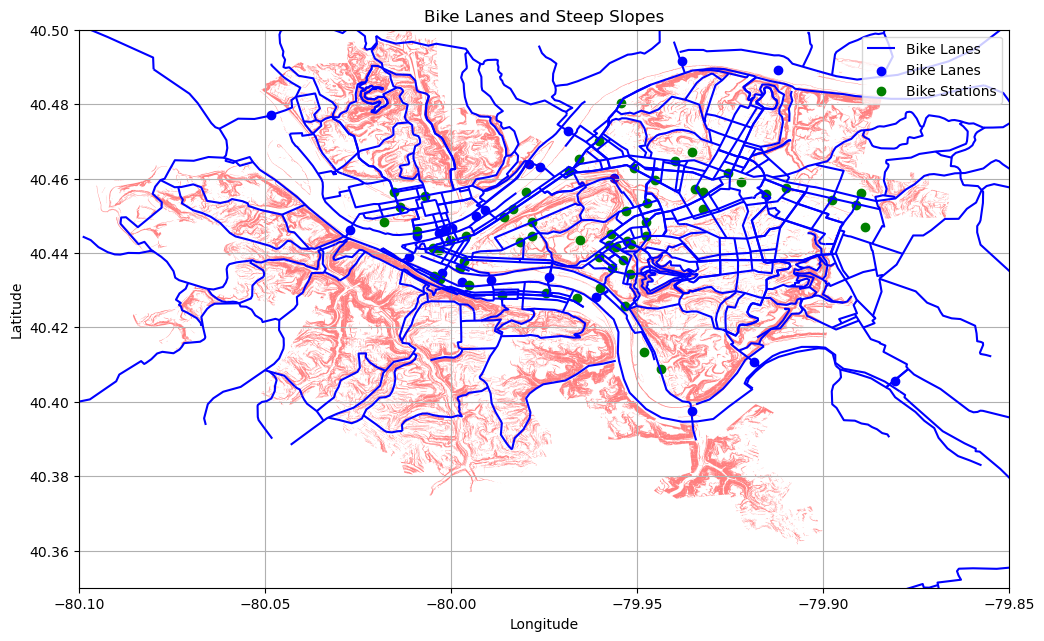

In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# 设置数据文件路径
bike_lane_geojson_path = "pittsburghbikelane(3).geojson"
slope_shapefile_path = "25%_or_Greater_Slope-shp\\"
station_locations_xlsx_path = "pogoh-station-locations-october-2023.xlsx"
bike_data_xlsx_path = "yeararound_bike_data.xlsx"
# 加载自行车道数据
bike_lanes_gdf = gpd.read_file(bike_lane_geojson_path)

# 加载坡度数据
slope_gdf = gpd.read_file(slope_shapefile_path)

# 加载自行车使用数据
bike_usage_df = pd.read_excel(bike_data_xlsx_path)

# 加载自行车站点数据
station_locations_df = pd.read_excel(station_locations_xlsx_path)

# 将自行车站点数据转换为GeoDataFrame
geometry = [Point(xy) for xy in zip(station_locations_df.Longitude, station_locations_df.Latitude)]
station_locations_gdf = gpd.GeoDataFrame(station_locations_df, geometry=geometry)

# 可视化自行车道和坡度超过25%的区域
fig, ax = plt.subplots(figsize=(12, 12))

# 设定地图的经度和纬度范围
ax.set_xlim(-80.1, -79.85)
ax.set_ylim(40.35, 40.50)

bike_lanes_gdf.plot(ax=ax, color='blue', label='Bike Lanes')
slope_gdf.plot(ax=ax, color='red', alpha=0.5,label='Slopes > 25%')
station_locations_gdf.plot(ax=ax, color='green', marker='o', label='Bike Stations')
plt.legend()
plt.title('Bike Lanes and Steep Slopes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()



In [89]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# 设置数据文件路径
bike_lane_geojson_path = "pittsburghbikelane(3).geojson"
slope_shapefile_path = "25%_or_Greater_Slope-shp\\"
station_locations_xlsx_path = "pogoh-station-locations-october-2023.xlsx"


# 加载自行车道数据
bike_lanes_gdf = gpd.read_file(bike_lane_geojson_path)


# 加载坡度数据
slope_gdf = gpd.read_file(slope_shapefile_path)


# 加载自行车站点数据
station_locations_df = pd.read_excel(station_locations_xlsx_path)#.head(1000)


In [90]:
# 显示DataFrame的列名
print(station_locations_df.columns)


Index(['Id', 'Name', 'Total Docks', 'Latitude', 'Longitude'], dtype='object')


In [91]:
# 统计每个站点的起始骑行次数和归还次数
start_counts = bike_usage_df.groupby('Start Station Id').size()
end_counts = bike_usage_df.groupby('End Station Id').size()

# 将 start_counts 和 end_counts 添加到 station_locations_df 中
station_locations_df = station_locations_df.set_index('Id')  # 确保 'Id' 是索引
station_locations_df['start_counts'] = start_counts
station_locations_df['end_counts'] = end_counts

# 重新设置索引为默认值，这样 'Id' 列将再次包含在列名中
station_locations_df = station_locations_df.reset_index()
print(station_locations_df.columns)


Index(['Id', 'Name', 'Total Docks', 'Latitude', 'Longitude', 'start_counts',
       'end_counts'],
      dtype='object')


In [93]:
import geopandas as gpd

# 显示DataFrame的列名
print(station_locations_df.columns)

# 假设'EPSG:4326'是原始数据的CRS
original_crs = "EPSG:4326"

# 选择一个适合距离和面积计算的CRS
target_crs = "EPSG:32617"

# 将数据转换到适合计算的CRS
station_locations_gdf = gpd.GeoDataFrame(station_locations_df,
                                         geometry=gpd.points_from_xy(station_locations_df.Longitude, station_locations_df.Latitude),
                                         crs=original_crs).to_crs(target_crs)

bike_lanes_gdf = bike_lanes_gdf.to_crs(target_crs)
slope_gdf = slope_gdf.to_crs(target_crs)

# 计算每个站点四英里范围内的可达面积
buffer_radius_miles = 4  # 四英里
buffer_radius = buffer_radius_miles * 1609.34  # 米
station_locations_gdf['accessible_area'] = station_locations_gdf.geometry.buffer(buffer_radius).area

# 计算每个站点四英里范围内经过的坡道数量
station_locations_gdf['slope_count'] = station_locations_gdf.geometry.buffer(buffer_radius).apply(
    lambda x: slope_gdf[slope_gdf.geometry.intersects(x)].shape[0]
)

# 计算四英里范围内自行车道的总长度
bike_lanes_length = bike_lanes_gdf.geometry.length.sum()
station_locations_gdf['bike_lane_length'] = station_locations_gdf.geometry.buffer(buffer_radius).apply(
    lambda x: bike_lanes_gdf[bike_lanes_gdf.geometry.intersects(x)].geometry.length.sum()
)

# 计算坡道所占的比例
station_locations_gdf['slope_proportion'] = station_locations_gdf['slope_count'] / (station_locations_gdf['bike_lane_length'] / buffer_radius_miles)

# # 如果'Id'列没有丢失，可以重新添加它
# ['Id'] = station_locations_df['Id']

# 显示修改后的DataFrame的列名
print(station_locations_gdf.columns)


Index(['Id', 'Name', 'Total Docks', 'Latitude', 'Longitude', 'start_counts',
       'end_counts'],
      dtype='object')
Index(['Id', 'Name', 'Total Docks', 'Latitude', 'Longitude', 'start_counts',
       'end_counts', 'geometry', 'accessible_area', 'slope_count',
       'bike_lane_length', 'slope_proportion'],
      dtype='object')


In [95]:
# # 检查并处理NaN值
# features = station_locations_gdf[['accessible_area', 'slope_proportion']]
# features = features.replace([np.inf, -np.inf], np.nan)  # 替换无限值为NaN
# features = features.dropna()  # 删除包含NaN的行
import numpy as np

# 通过查询空值和无限值的行来查找它们
nan_rows = features[features.isnull().any(axis=1)]
inf_rows = features[(features == np.inf).any(axis=1) | (features == -np.inf).any(axis=1)]

# 替换无限值为平均值
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(features.mean(), inplace=True)

# 空值保留为0
features.fillna(0, inplace=True)



In [96]:
# 选择要保留的列
columns_to_keep = ['Id',  'bike_lane_length', 'slope_proportion','accessible_area']

# 从 station_locations_gdf 中选择指定列并添加回 station_locations_df
station_locations_df = station_locations_df.merge(station_locations_gdf[columns_to_keep], on='Id', how='left', suffixes=('', '_gdf'))

# 打印更新后的 station_locations_df
print(station_locations_df.columns)


Index(['Id', 'Name', 'Total Docks', 'Latitude', 'Longitude', 'start_counts',
       'end_counts', 'bike_lane_length', 'slope_proportion',
       'accessible_area'],
      dtype='object')


                  accessible_area  slope_proportion  start_counts  end_counts
accessible_area          1.000000          0.012920     -0.040980   -0.046392
slope_proportion         0.012920          1.000000      0.159751    0.156370
start_counts            -0.040980          0.159751      1.000000    0.989950
end_counts              -0.046392          0.156370      0.989950    1.000000


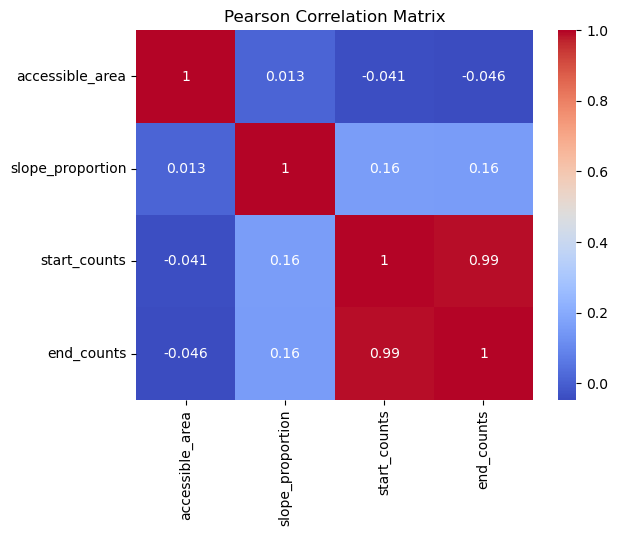

In [97]:


# 计算 Pearson 相关性
pearson_corr = station_locations_df[['accessible_area', 'slope_proportion', 'start_counts', 'end_counts']].corr(method='pearson')

# 输出相关性矩阵
print(pearson_corr)

# 可视化相关性矩阵
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()


                  accessible_area  slope_proportion  start_counts  end_counts
accessible_area          1.000000         -0.006740     -0.116513   -0.116513
slope_proportion        -0.006740          1.000000      0.224285    0.222395
start_counts            -0.116513          0.224285      1.000000    0.991609
end_counts              -0.116513          0.222395      0.991609    1.000000


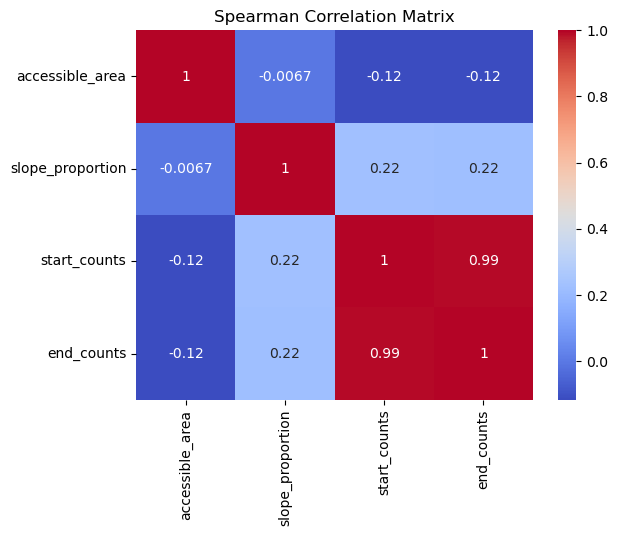

In [98]:
# 计算 Spearman 相关性
spearman_corr = station_locations_df[['accessible_area', 'slope_proportion', 'start_counts', 'end_counts']].corr(method='spearman')

# 输出相关性矩阵
print(spearman_corr)

# 可视化相关性矩阵
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()


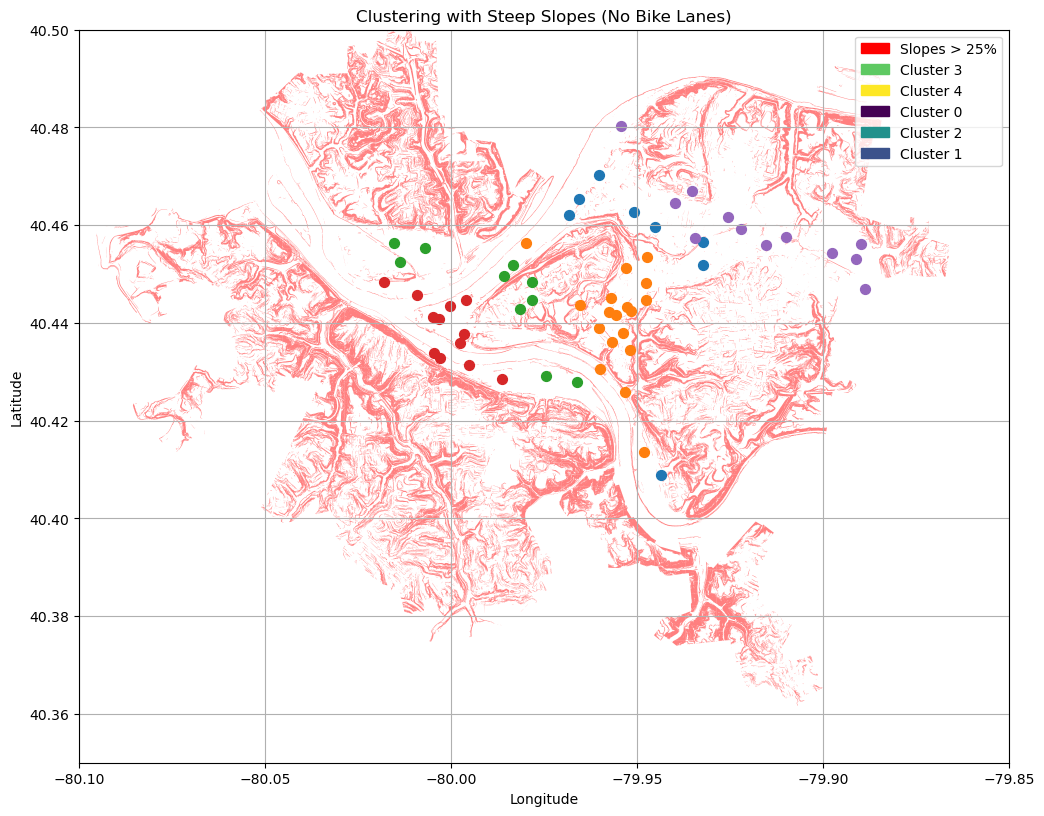

In [102]:
# 将站点坐标转换回原始坐标系
station_locations_gdf = station_locations_gdf.to_crs(original_crs)

# 将坡道地图转换回原始坐标系
slope_gdf = slope_gdf.to_crs(original_crs)

from sklearn.cluster import KMeans

# 选择用于聚类的特征
X = station_locations_df[['accessible_area', 'slope_proportion']]

# 定义K均值聚类模型，假设要分为4个簇
kmeans = KMeans(n_clusters=4, random_state=0)

# 进行聚类
station_locations_df['cluster'] = kmeans.fit_predict(X)
# 将站点坐标转换回原始坐标系
station_locations_gdf = station_locations_gdf.to_crs(original_crs)

# 之后的可视化代码...

import matplotlib.patches as mpatches

# 可视化坡度超过25%的区域和站点聚类结果
fig, ax = plt.subplots(figsize=(12, 12))

# 设定地图的经度和纬度范围
ax.set_xlim(-80.1, -79.85)
ax.set_ylim(40.35, 40.50)

# 绘制坡度分布（超过25%的区域）
slope_gdf.plot(ax=ax, color='red', alpha=0.5, label='Slopes > 25%')


# 绘制自行车站点聚类结果
for cluster_label in station_locations_gdf['cluster'].unique():
    cluster_data = station_locations_gdf[station_locations_gdf['cluster'] == cluster_label]
    ax.scatter(cluster_data.geometry.x, cluster_data.geometry.y, label=f'Cluster {cluster_label}', s=50)  # 使用scatter绘制散点图

# 创建图例
red_patch = mpatches.Patch(color='red', label='Slopes > 25%')
cluster_legend = [mpatches.Patch(color=plt.cm.viridis(cluster_label/4), label=f'Cluster {cluster_label}') 
                  for cluster_label in station_locations_gdf['cluster'].unique()]

ax.legend(handles=[red_patch] + cluster_legend)

ax.set_title('Clustering with Steep Slopes (No Bike Lanes)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)
plt.show()


In [103]:
# 中文注释: 计算不同聚类的特征平均值
cluster_avg = station_locations_gdf.groupby('cluster')[['accessible_area', 'slope_proportion']].mean()

# 中文注释: 对聚类按照坡道比例的平均值进行排序，从大到小
cluster_avg_sorted = cluster_avg.sort_values(by='slope_proportion', ascending=False)

# 输出排序后的聚类平均值
print("按坡道比例排序的聚类平均值：")
print(cluster_avg_sorted)


按坡道比例排序的聚类平均值：
         accessible_area  slope_proportion
cluster                                   
2           1.299773e+08          0.010141
0           1.299773e+08          0.009296
4           1.299773e+08          0.008451
3           1.299773e+08          0.007603
1           1.299773e+08          0.006505


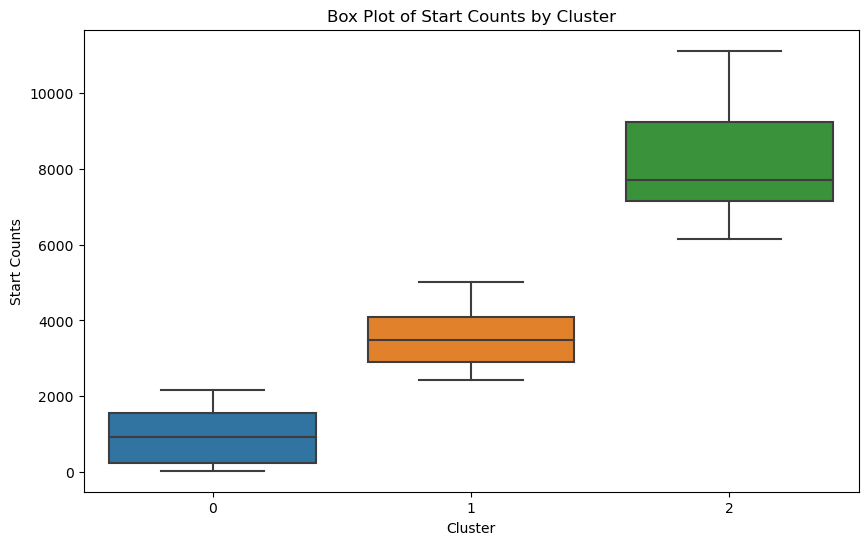

In [104]:
# 删除或填充 NaN 值
station_locations_df.fillna({
    'start_counts': station_locations_df['start_counts'].median(), 
    'slope_proportion': station_locations_df['slope_proportion'].median()
}, inplace=True)

# 检查并处理无限值
station_locations_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 再次尝试执行 K-means 聚类，这次选择 K=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
station_locations_df['cluster'] = kmeans.fit_predict(station_locations_df[['start_counts', 'slope_proportion']])

# 为每个聚类创建箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='start_counts', data=station_locations_df)
plt.title('Box Plot of Start Counts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Start Counts')
plt.show()


In [105]:
import geopandas as gpd
import os

# 设置 Shapefile 文件所在的文件夹路径
folder_path = r"D:\大四上\1171\project\project\pittsburghpaneighborhoods"

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    if filename.endswith(".shp"):
        # 构建完整的文件路径
        file_path = os.path.join(folder_path, filename)

        # 使用 Geopandas 读取 Shapefile 文件
        gdf = gpd.read_file(file_path)

        # 打印文件名和数据
        print(f"文件名: {filename}")
        print(gdf)

        # 如果你想可视化这个 Shapefile，可以取消下面这行代码的注释
        # gdf.plot()

        # 添加一个空行以分隔不同的文件内容
        print("\n")


文件名: Neighborhoods_.shp
    OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         233        42        003    140500          3   
1          2         203        42        003    140100          3   
2          3          86        42        003    101700          2   
3          4         214        42        003    050900          1   
4          5         173        42        003    300100          5   
..       ...         ...       ...        ...       ...        ...   
85        86         215        42        003    141000          1   
86        87         211        42        003    051100          1   
87        88         153        42        003    562600          2   
88        89          16        42        003    170200          1   
89        90          31        42        003    250900          2   

         geoid10     namelsad10 mtfcc10 funcstat10  ...  created_us  \
0   420031405003  Block Group 3   G5030          S  ...         

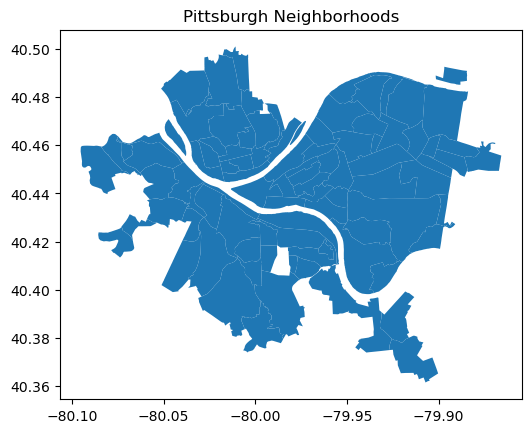

In [106]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 设置 Shapefile 文件的路径
file_path = r"pittsburghpaneighborhoods\Neighborhoods_.shp"

# 使用 Geopandas 读取 Shapefile 文件
gdf = gpd.read_file(file_path)

# 绘制地图
gdf.plot()

# 设置图表标题
plt.title('Pittsburgh Neighborhoods')

# 显示绘制的地图
plt.show()


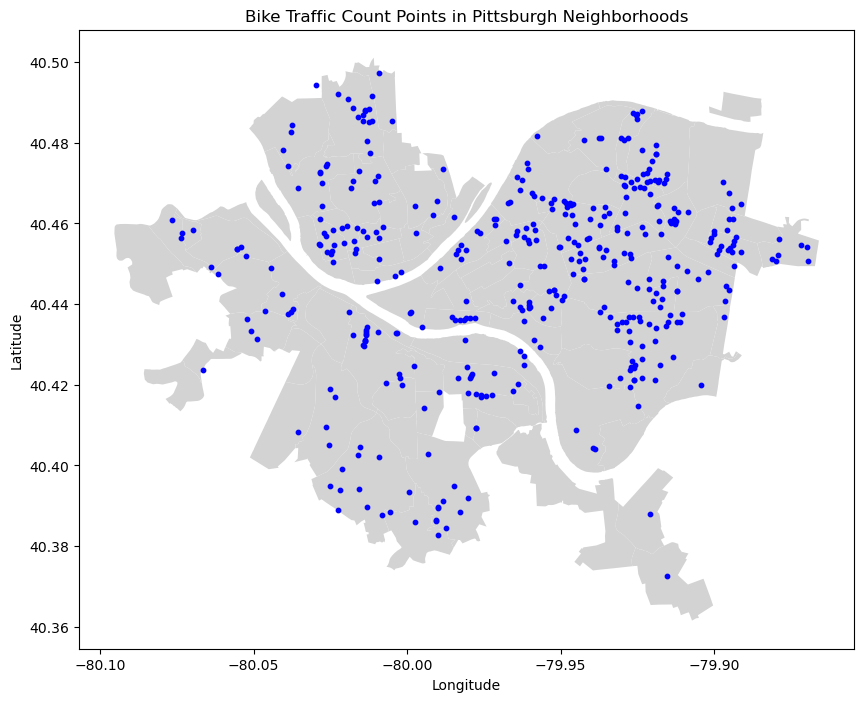

In [108]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# 加载社区地图GeoDataFrame
neighborhoods_file_path = 'pittsburghpaneighborhoods'
neighborhoods_gdf = gpd.read_file(neighborhoods_file_path)

# 加载自行车交通计数数据
traffic_data_file_path = 'Bike Traffic Count Data.csv'
traffic_df = pd.read_csv(traffic_data_file_path, encoding='latin-1')


# 将自行车交通计数数据转换为GeoDataFrame
# 注意：确保longitude和latitude列名与你的数据集中的列名匹配
geometry = [Point(xy) for xy in zip(traffic_df.longitude, traffic_df.latitude)]
traffic_gdf = gpd.GeoDataFrame(traffic_df, geometry=geometry)

# 设置坐标参考系统(CRS) —— 确保与社区地图的CRS相匹配
traffic_gdf.set_crs(neighborhoods_gdf.crs, inplace=True)

# 开始绘制地图
fig, ax = plt.subplots(figsize=(10, 10))
neighborhoods_gdf.plot(ax=ax, color='lightgrey')  # 绘制社区地图为背景，颜色为浅灰色
traffic_gdf.plot(ax=ax, color='blue', markersize=10)  # 在社区地图上叠加自行车交通计数点，颜色为蓝色

# 可以添加额外的图表标题和标签
plt.title('Bike Traffic Count Points in Pittsburgh Neighborhoods')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图表
plt.show()


In [116]:
#the running time for this block might be too long
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# 设置数据文件路径
bike_lane_geojson_path = "pittsburghbikelane(3).geojson"
slope_shapefile_path = "25%_or_Greater_Slope-shp\\"
station_locations_xlsx_path = "pogoh-station-locations-october-2023.xlsx"
bike_data_xlsx_path = "yeararound_bike_data.xlsx"

# 加载自行车道数据
bike_lanes_gdf = gpd.read_file(bike_lane_geojson_path)

# 加载坡度数据
slope_gdf = gpd.read_file(slope_shapefile_path)

# 加载自行车使用数据
bike_usage_df = pd.read_excel(bike_data_xlsx_path)

# 加载自行车站点数据
station_locations_df = pd.read_excel(station_locations_xlsx_path)

# 将自行车站点数据转换为GeoDataFrame
geometry = [Point(xy) for xy in zip(station_locations_df.Longitude, station_locations_df.Latitude)]
station_locations_gdf = gpd.GeoDataFrame(station_locations_df, geometry=geometry)

# 创建一个新的GeoDataFrame，用于存储骑行路径数据
ride_lines = []

# 遍历自行车使用数据，创建骑行路径
for index, row in bike_usage_df.iterrows():
    start_station = station_locations_gdf[station_locations_gdf['Id'] == row['Start Station Id']]
    end_station = station_locations_gdf[station_locations_gdf['Id'] == row['End Station Id']]
    
    if not start_station.empty and not end_station.empty:
        ride_line = LineString([start_station.geometry.iloc[0], end_station.geometry.iloc[0]])
        ride_lines.append({'geometry': ride_line})

# 将所有骑行路径数据合并为一个GeoDataFrame
ride_lines_gdf = gpd.GeoDataFrame(ride_lines)

# 可视化自行车道和坡度超过25%的区域
fig, ax = plt.subplots(figsize=(12, 12))

# 设定地图的经度和纬度范围
ax.set_xlim(-80.1, -79.85)
ax.set_ylim(40.35, 40.50)

bike_lanes_gdf.plot(ax=ax, color='blue', label='Bike Lanes')
slope_gdf.plot(ax=ax, color='red', alpha=0.5, label='Slopes > 25%')
station_locations_gdf.plot(ax=ax, color='green', marker='o', label='Bike Stations')
ride_lines_gdf.plot(ax=ax, cmap='cool', linewidth=1, label='Ride Lines')

plt.legend()
plt.title('Bike Lanes and Steep Slopes with Ride Lines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

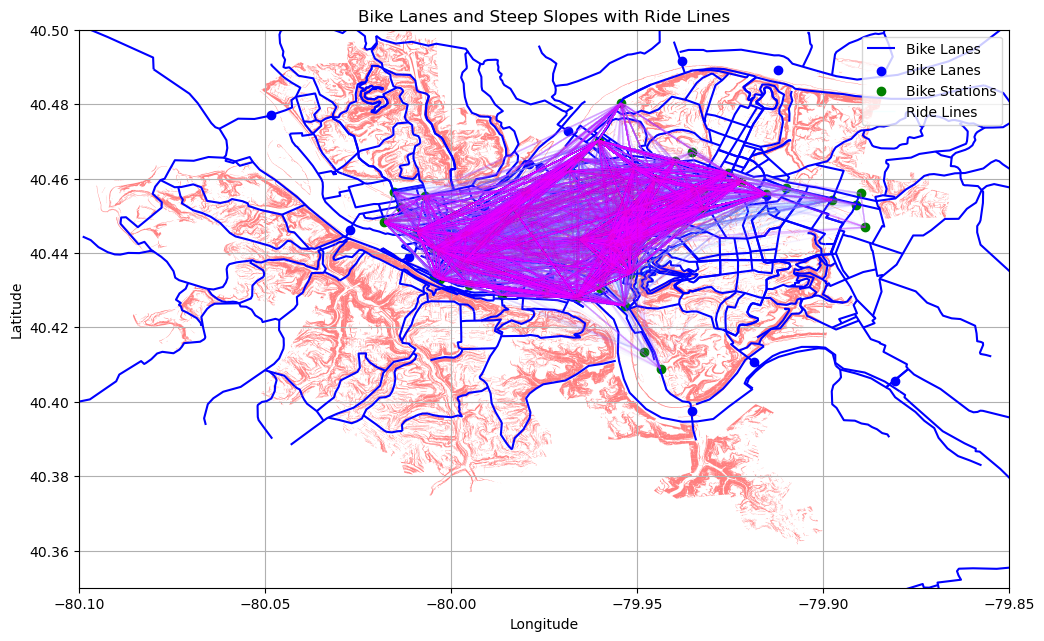

In [123]:
# 将所有骑行路径数据合并为一个GeoDataFrame
ride_lines_gdf = gpd.GeoDataFrame(ride_lines)

# 可视化自行车道和坡度超过25%的区域
fig, ax = plt.subplots(figsize=(12, 12))

# 设定地图的经度和纬度范围
ax.set_xlim(-80.1, -79.85)
ax.set_ylim(40.35, 40.50)

bike_lanes_gdf.plot(ax=ax, color='blue', label='Bike Lanes')
slope_gdf.plot(ax=ax, color='red', alpha=0.5, label='Slopes > 25%')
station_locations_gdf.plot(ax=ax, color='green', marker='o', label='Bike Stations')
ride_lines_gdf.plot(ax=ax, cmap='cool', linewidth=1, alpha=0.04,label='Ride Lines')

plt.legend()
plt.title('Bike Lanes and Steep Slopes with Ride Lines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [138]:
import pandas as pd
import geopandas as gpd
import numpy as np
from datetime import datetime

# 读取社区名称的Shapefile
shapefile_path = 'pittsburghpaneighborhoods/Neighborhoods_.shp'
gdf = gpd.read_file(shapefile_path)
neighborhoods = gdf['hood'].unique()
csv_path= "Bike Traffic Count Data.csv"
# 读取Bike Traffic Count Data
df = pd.read_csv(csv_path, encoding='latin-1')



# 处理日期格式并计算日期间隔
df['count_start_date'] = pd.to_datetime(df['count_start_date'])
df['count_end_date'] = pd.to_datetime(df['count_end_date'])
df['duration'] = (df['count_end_date'] - df['count_start_date']).dt.days

# 去除起止日期为空的行
df = df.dropna(subset=['count_start_date', 'count_end_date'])

# 初始化最终的DataFrame
final_df = pd.DataFrame(index=neighborhoods)

# 计算每个社区的加权平均汽车和自行车流量
for neighborhood in neighborhoods:
    subset = df[df['neighborhood'] == neighborhood]
    # 计算加权平均汽车流量
    total_duration = subset['duration'].sum()
    if total_duration > 0:
        weighted_car_traffic = np.average(subset['average_daily_car_traffic'], weights=subset['duration'])
        final_df.loc[neighborhood, 'average_daily_car_traffic'] = weighted_car_traffic
        # 计算加权平均自行车流量
        weighted_bike_traffic = np.average(subset['average_daily_bike_traffic'], weights=subset['duration'])
        final_df.loc[neighborhood, 'average_daily_bike_traffic'] = weighted_bike_traffic
    else:
        final_df.loc[neighborhood, 'average_daily_car_traffic'] = np.nan
        final_df.loc[neighborhood, 'average_daily_bike_traffic'] = np.nan

    # 计算最大速度
    final_df.loc[neighborhood, 'max_speed'] = subset['max_speed'].max()

    # 计算超速百分比的加权平均值
    if total_duration > 0:
        weighted_percent_over_limit = np.average(subset['percent_over_limit'], weights=subset['duration'])
        final_df.loc[neighborhood, 'percent_over_limit'] = weighted_percent_over_limit
    else:
        final_df.loc[neighborhood, 'percent_over_limit'] = np.nan


output_path = 'final_output.csv'
final_df.to_csv(output_path)

print("数据处理完成，结果已保存至:", output_path)


数据处理完成，结果已保存至: final_output.csv


In [141]:
import pandas as pd

# 读取第一个CSV文件
csv_path1 = 'overdose by neighborhood.csv'
df1 = pd.read_csv(csv_path1)

# 修改列名为 'neighborhood'
df1.rename(columns={'geo_area_name': 'neighborhood'}, inplace=True)

# 保存修改后的文件
df1.to_csv(csv_path1, index=False)

# 读取第二个CSV文件
csv_path2 = 'final_output.csv'
df2 = pd.read_csv(csv_path2)

# 删除第一列
df2.drop(df2.columns[0], axis=1, inplace=True)

# 假设现在的第一列（原本的第二列）需要重命名为 'neighborhood'
# 这里我们假设现在的第一列名是 'current_first_column_name'
df2.rename(columns={df2.columns[0]: 'neighborhood'}, inplace=True)

# 保存修改后的文件
df2.to_csv(csv_path2, index=False)


In [142]:
import pandas as pd

# 读取final_neighborhood.csv文件
final_neighborhood_path = 'final_output.csv'
final_df = pd.read_csv(final_neighborhood_path)

# 读取overdose by neighborhood.csv文件
overdose_path = 'overdose by neighborhood.csv'
overdose_df = pd.read_csv(overdose_path)

# 计算每个社区的药物过量总数
overdose_counts = overdose_df.groupby('neighborhood')['kpi_count'].sum()

# 将药物过量数据合并到final_df中
final_df = final_df.join(overdose_counts, on='neighborhood', how='left')

# 填充缺失值为0
final_df['kpi_count'].fillna(0, inplace=True)

# 重命名列名
final_df.rename(columns={'kpi_count': 'total_overdoses'}, inplace=True)

# 保存更新后的CSV文件
final_df.to_csv('final_neighborhood_updated.csv', index=False)

print("数据合并完成，更新后的文件已保存。")


数据合并完成，更新后的文件已保存。


In [148]:
import geopandas as gpd
import pandas as pd

# 加载社区数据
neighborhoods_path = r'pittsburghpaneighborhoods\Neighborhoods_.shp'
neighborhoods_gdf = gpd.read_file(neighborhoods_path)

# 加载坡度数据
slope_path = "25%_or_Greater_Slope-shp\\"
slope_gdf = gpd.read_file(slope_path)

# 设置适合计算的CRS
target_crs = "EPSG:32617"
slope_gdf = slope_gdf.to_crs(target_crs)

# 计算坡度区域的面积（在目标CRS中）
slope_gdf['slope_area'] = slope_gdf.geometry.area / 2589988.11  # 将平方米转换为平方英里

# 转换回原始坐标系
slope_gdf = slope_gdf.to_crs(neighborhoods_gdf.crs)

# 空间连接坡度数据和社区数据
joined_gdf = gpd.sjoin(slope_gdf, neighborhoods_gdf, how="inner", op='intersects')

# 计算每个社区的坡度大于25%的面积占比
slope_area_by_neighborhood = joined_gdf.groupby('hood')['slope_area'].sum()
slope_area_ratio = slope_area_by_neighborhood / neighborhoods_gdf.set_index('hood')['sqmiles']

# 将slope_area_ratio转换为DataFrame，并重命名索引列以及占比列
slope_area_ratio_df = slope_area_ratio.reset_index().rename(columns={'hood': 'neighborhood', 0: 'slope_area_ratio'})

# 加载final_neighborhood_updated.csv文件
final_neighborhood_path = "final_neighborhood_updated.csv"
final_df = pd.read_csv(final_neighborhood_path)

# 合并坡度占比数据到final_df中
final_df = pd.merge(final_df, slope_area_ratio_df, on='neighborhood', how='left')

# 保存更新后的CSV文件回原文件中
final_df.to_csv(final_neighborhood_path, index=False)

print("坡度占比特征已添加到final_neighborhood_updated.csv文件中。")


C:\Users\28367\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


坡度占比特征已添加到final_neighborhood_updated.csv文件中。


In [153]:
# import geopandas as gpd
# import pandas as pd

# # 加载社区数据
# neighborhoods_path = "D:\\大四上\\1171\\project\\project\\pittsburghpaneighborhoods\\Neighborhoods_.shp"
# neighborhoods_gdf = gpd.read_file(neighborhoods_path)

# # 加载坡度数据
# slope_path = "D:\\大四上\\1171\\project\\project\\25%_or_Greater_Slope-shp\\"
# slope_gdf = gpd.read_file(slope_path)

# # 设置适合计算的CRS
# target_crs = "EPSG:32617"

# # 转换坐标系
# neighborhoods_gdf = neighborhoods_gdf.to_crs(target_crs)
# slope_gdf = slope_gdf.to_crs(target_crs)

# # 计算坡度区域的面积（在目标CRS中）
# slope_gdf['slope_area'] = slope_gdf.geometry.area / 2589988.11  # 将平方米转换为平方英里

# # 计算每个社区的总面积（在目标CRS中）
# neighborhoods_gdf['total_area'] = neighborhoods_gdf.geometry.area / 2589988.11  # 将平方米转换为平方英里

# # 空间连接坡度数据和社区数据
# joined_gdf = gpd.sjoin(slope_gdf, neighborhoods_gdf, how="inner", op='intersects')

# # 计算每个社区的坡度面积
# slope_area_by_neighborhood = joined_gdf.groupby('hood')['slope_area'].sum()

# # 从neighborhoods_gdf中获取每个社区的总面积
# total_area_by_neighborhood = neighborhoods_gdf.set_index('hood')['total_area']

# # 加载final_neighborhood.csv文件
# final_neighborhood_path = "D:\\大四上\\1171\\project\\project\\final_neighborhood.csv"
# final_df = pd.read_csv(final_neighborhood_path)

# # 合并坡度面积和总面积数据到final_df中
# final_df = final_df.set_index('hood')
# final_df['slope_area'] = slope_area_by_neighborhood
# final_df['total_area_sqmiles'] = total_area_by_neighborhood

# # 保存更新后的CSV文件
# final_df.reset_index().to_csv(final_neighborhood_path, index=False)

# print("坡度面积和总面积数据已添加到final_neighborhood.csv文件中。")


C:\Users\28367\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


坡度面积和总面积数据已添加到final_neighborhood.csv文件中。


In [149]:
import geopandas as gpd
import pandas as pd

# 加载社区数据
neighborhoods_path = r"pittsburghpaneighborhoods\Neighborhoods_.shp"
neighborhoods_gdf = gpd.read_file(neighborhoods_path)

# 加载自行车道数据
bike_infrastructure_path = r"pittsburghbikeinfrastructure (4).geojson"
bike_lanes_gdf = gpd.read_file(bike_infrastructure_path)

# 设置适合计算的CRS
target_crs = "EPSG:32617"

# 转换坐标系
neighborhoods_gdf = neighborhoods_gdf.to_crs(target_crs)
bike_lanes_gdf = bike_lanes_gdf.to_crs(target_crs)

# 计算自行车道长度（在目标CRS中）
bike_lanes_gdf['lane_length'] = bike_lanes_gdf.geometry.length / 1609.34  # 将米转换为英里

# 空间连接自行车道数据和社区数据
joined_gdf = gpd.sjoin(bike_lanes_gdf, neighborhoods_gdf, how="inner", op='intersects')

# 计算每个社区的自行车道总长度
bike_lane_length_by_neighborhood = joined_gdf.groupby('hood')['lane_length'].sum()

# 将bike_lane_length_by_neighborhood转换为DataFrame，并重命名索引列以及长度列
bike_lane_length_df = bike_lane_length_by_neighborhood.reset_index().rename(columns={'hood': 'neighborhood', 'lane_length': 'bike_lane_length_miles'})

# 加载final_neighborhood.csv文件
final_neighborhood_path = "final_neighborhood_updated.csv"
final_df = pd.read_csv(final_neighborhood_path)

# 合并自行车道长度数据到final_df中
final_df = pd.merge(final_df, bike_lane_length_df, on='neighborhood', how='left')

# 保存更新后的CSV文件
final_df.to_csv(final_neighborhood_path, index=False)

print("自行车道长度数据已添加到final_neighborhood_updated.csv文件中。")


自行车道长度数据已添加到final_neighborhood_updated.csv文件中。


C:\Users\28367\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [163]:
import pandas as pd
import geopandas as gpd

# 加载社区数据
neighborhoods_path = r"pittsburghpaneighborhoods\Neighborhoods_.shp"
neighborhoods_gdf = gpd.read_file(neighborhoods_path)

# 加载站点数据
station_locations_path = "pogoh-station-locations-october-2023.xlsx"
station_locations_df = pd.read_excel(station_locations_path)

# 创建站点的GeoDataFrame
station_locations_gdf = gpd.GeoDataFrame(station_locations_df, geometry=gpd.points_from_xy(station_locations_df.Longitude, station_locations_df.Latitude), crs="EPSG:4326")
station_locations_gdf = station_locations_gdf.to_crs(neighborhoods_gdf.crs)

# 空间连接站点数据和社区数据
joined_stations_gdf = gpd.sjoin(station_locations_gdf, neighborhoods_gdf, how="inner", op='intersects')

# 统计每个社区的站点数量
station_count_by_neighborhood = joined_stations_gdf.groupby('hood').size()

# 转换为DataFrame
station_count_df = station_count_by_neighborhood.reset_index().rename(columns={0: 'station_count', 'hood': 'neighborhood'})

# 加载骑行数据
bike_data_path = "yeararound_bike_data.xlsx"
bike_data_df = pd.read_excel(bike_data_path)

# 创建站点ID到社区名称的映射
station_to_neighborhood = joined_stations_gdf[['Id', 'hood']].set_index('Id')['hood']

# 将骑行数据中的站点ID映射到社区名称
bike_data_df['Start Neighborhood'] = bike_data_df['Start Station Id'].map(station_to_neighborhood)
bike_data_df['End Neighborhood'] = bike_data_df['End Station Id'].map(station_to_neighborhood)

# 统计每个社区的开始和终止骑行用户次数
start_rides_by_neighborhood = bike_data_df.groupby('Start Neighborhood').size()
end_rides_by_neighborhood = bike_data_df.groupby('End Neighborhood').size()

# 转换为DataFrame
start_rides_df = start_rides_by_neighborhood.reset_index().rename(columns={0: 'start_rides_count', 'Start Neighborhood': 'neighborhood'})
end_rides_df = end_rides_by_neighborhood.reset_index().rename(columns={0: 'end_rides_count', 'End Neighborhood': 'neighborhood'})

# 加载final_neighborhood_updated.csv文件
final_neighborhood_path = "final_neighborhood_updated.csv"
final_df = pd.read_csv(final_neighborhood_path)

# 合并数据到 final_df 中
final_df = pd.merge(final_df, station_count_df, on='neighborhood', how='left')
final_df = pd.merge(final_df, start_rides_df, on='neighborhood', how='left')
final_df = pd.merge(final_df, end_rides_df, on='neighborhood', how='left')

# 保存更新后的CSV文件
final_df.to_csv(final_neighborhood_path, index=False)

print("站点数量及骑行数据已添加到final_neighborhood_updated.csv文件中。")


C:\Users\28367\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\28367\AppData\Local\Temp\ipykernel_1420\305785497.py:27: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  bike_data_df = pd.read_excel(bike_data_path)


In the "race population in community.csv" file, the population data for Arlington (Arlington Heights) should be manually divided by 2 and split into two rows, representing the data for these two communities separately as "Arlington" and "Arlington Heights."

In [162]:
import pandas as pd
import os

# 获取当前脚本所在的目录
current_dir = os.path.dirname("project")

# 定义文件路径相对于当前目录
race_population_path = os.path.join(current_dir, 'race population in community.csv')
final_neighborhood_path = os.path.join(current_dir, 'final_neighborhood_updated.csv')
output_path = os.path.join(current_dir, 'final_neighborhood_updated.csv')

# 加载社区人口数据
race_population_df = pd.read_csv(race_population_path)

# 重命名列以匹配
race_population_df.rename(columns={'hood': 'neighborhood'}, inplace=True)

# 加载最终社区特征数据
final_neighborhood_df = pd.read_csv(final_neighborhood_path)

# 根据neighborhood字段合并数据
merged_df = pd.merge(final_neighborhood_df, race_population_df, on='neighborhood', how='left')

# 保存合并后的数据
merged_df.to_csv(output_path, index=False)

print("人口数据已成功合并到final_neighborhood_updated.csv文件中。")


人口数据已成功合并到final_neighborhood_updated.csv文件中。


In [20]:
# 查找包含 "Arlington" 的字段
arlington_hoods = neighborhoods_gdf[neighborhoods_gdf['hood'].str.contains('Arlington', case=False)]

# 打印包含 "Arlington" 的字段
print(arlington_hoods)


    OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
18        19         202        42        003    561600          1   
49        50         143        42        003    561600          2   

         geoid10     namelsad10 mtfcc10 funcstat10  ...  created_us  \
18  420035616001  Block Group 1   G5030          S  ...         SDE   
49  420035616002  Block Group 2   G5030          S  ...         SDE   

    created_da last_edite  last_edi_1  temp  pghdb_sde_  \
18  2020-08-14        SDE  2020-08-14  None   3667921.5   
49  2020-08-14        SDE  2020-08-14  None  13108599.0   

                                GlobalID    Shape__Are    Shape__Len  \
18  12942113-8e97-4056-a9aa-2153476c947d  3.547057e+06  10500.115817   
49  183f541a-9d7d-4455-a5b0-19e128eadda6  1.338105e+07  28091.768500   

                                             geometry  
18  POLYGON ((-79.96027 40.41810, -79.96023 40.418...  
49  POLYGON ((-79.96113 40.42115, -79.95963 40.420...  

[2 rows x 4

In [176]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# 加载数据
data = pd.read_csv(r'final_neighborhood_updated.csv')

# 定义需要插补的列和特征列
columns_to_impute = ['average_daily_car_traffic', 'average_daily_bike_traffic', 'max_speed', 'percent_over_limit']
features = ['total_overdoses', 'slope_area_ratio', 'bike_lane_length_miles', 'station_count', 'start_rides_count', 'end_rides_count', '2020_Total_Population']

# 填充特征列中的空值
data[features] = data[features].fillna(0)

# 创建一个空的 DataFrame 用于存储预测值
predicted_values_df = pd.DataFrame(index=data.index)

# 对每个需要插补的列进行迭代
for column in columns_to_impute:
    # 分离有值和无值的数据
    train_data = data[data[column].notna()]
    predict_data = data[data[column].isna()]

    # 定义特征和目标
    X_train = train_data[features]
    y_train = train_data[column]

    # 训练 XGBoost 模型
    model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.4, learning_rate=0.1, max_depth=3, alpha=10, n_estimators=50)
    model.fit(X_train, y_train)

    # 预测缺失值
    X_predict = predict_data[features]
    predicted_values = model.predict(X_predict)

    # 将预测值存储在新的 DataFrame 中
    predicted_values_df.loc[predict_data.index, column] = predicted_values

# 将预测值合并回原始数据集
data.update(predicted_values_df)

# 保存处理后的数据
data.to_csv(r'final_neighborhood_updated.csv', index=False)


In [180]:
import pandas as pd

# 加载数据
data = pd.read_csv('final_neighborhood_updated.csv')
# 计算各族裔在所有社区中2020年的总人口比例
total_population = data['2020_Total_Population'].sum()
percentages = {
    '2020_White_Alone_Population': data['2020_White_Alone_Population'].sum() / total_population,
    '2020_Black_Alone_Population': data['2020_Black_Alone_Population'].sum() / total_population,
    '2020_American_Indian_and_Alaska_Native_alone_population': data['2020_American_Indian_and_Alaska_Native_alone_population'].sum() / total_population,
    '2020_Asian_Alone_Population': data['2020_Asian_Alone_Population'].sum() / total_population,
    '2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio': data['2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio'].sum() / total_population,
    '2020_Any_other_single_race_alone_Popualtion': data['2020_Any_other_single_race_alone_Popualtion'].sum() / total_population,
    '2020_Population_two_or_more_races': data['2020_Population_two_or_more_races'].sum() / total_population,
    '2020_Hispanic_or_Latino_Population': data['2020_Hispanic_or_Latino_Population'].sum() / total_population
}

# 计算易感性权重（族裔人口比例的倒数）
vulnerability_weights = {race: 1 / percentage for race, percentage in percentages.items() if percentage > 0}

# 计算每个社区的易感性指数
for index, row in data.iterrows():
    vulnerability_score = 0
    for race, weight in vulnerability_weights.items():
        race_percentage = row[race] / row['2020_Total_Population'] if row['2020_Total_Population'] > 0 else 0
        vulnerability_score += weight * race_percentage
    data.at[index, 'Vulnerability_Index'] = vulnerability_score
# 保存更新后的数据回原数据集
data.to_csv('final_neighborhood_updated.csv', index=False)

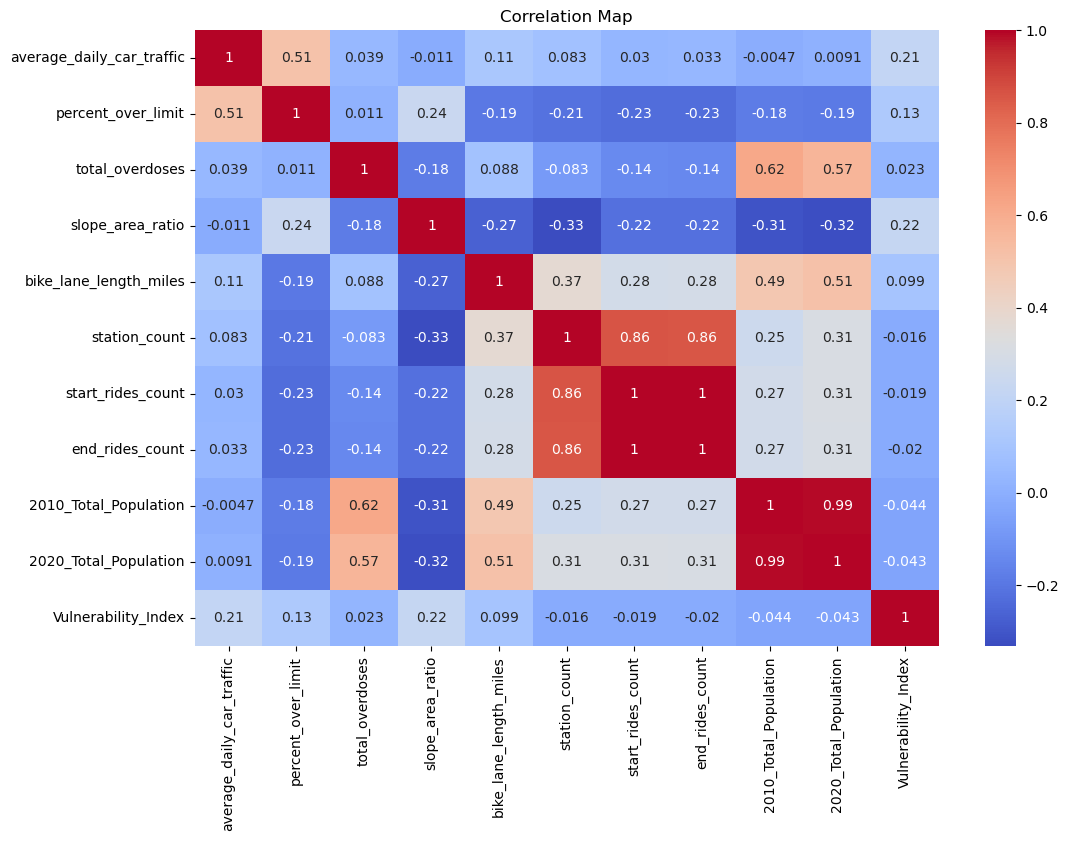

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('final_neighborhood_updated.csv')

# 只保留 station_count 非空的行
data = data[data['station_count'].notna()]

# 选择指定的列
columns = ['average_daily_car_traffic', 'percent_over_limit', 'total_overdoses', 
           'slope_area_ratio', 'bike_lane_length_miles', 'station_count', 
           'start_rides_count', 'end_rides_count', '2010_Total_Population', 
           '2020_Total_Population', 'Vulnerability_Index']

data_selected = data[columns]

# 计算相关性
correlation_matrix = data_selected.corr()

# 绘制相关性地图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()


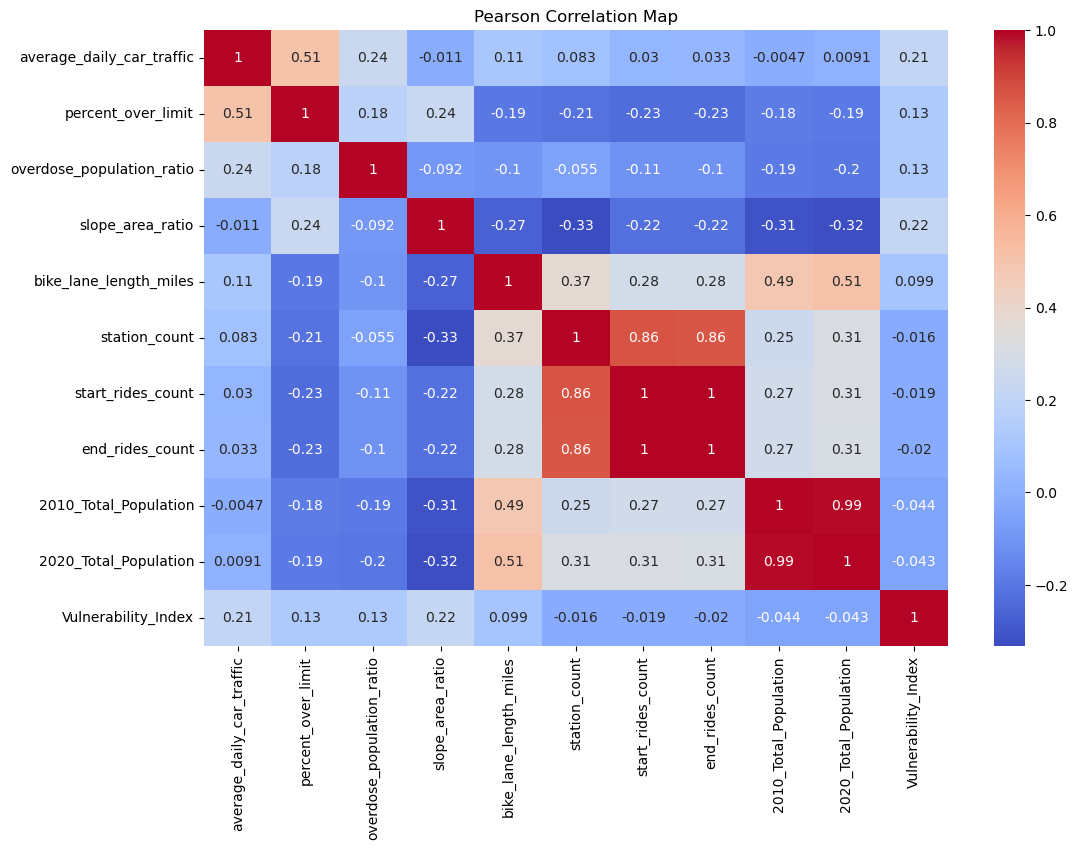

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('final_neighborhood_updated.csv')

# 过滤数据
data = data[data['station_count'].notna()]

# 计算过量与总人口的比例
data['overdose_population_ratio'] = data['total_overdoses'] / data['2020_Total_Population']

# 选择列（使用新的比例列替代 total_overdoses）
columns = ['average_daily_car_traffic', 'percent_over_limit', 'overdose_population_ratio', 
           'slope_area_ratio', 'bike_lane_length_miles', 'station_count', 
           'start_rides_count', 'end_rides_count', '2010_Total_Population', 
           '2020_Total_Population', 'Vulnerability_Index']

data_selected = data[columns]

# 计算皮尔逊相关性
correlation_matrix = data_selected.corr(method='pearson')

# 绘制相关性热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Map')
plt.show()


In [185]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 加载数据
data = pd.read_csv('final_neighborhood_updated.csv')

# 选择相关性高的特征
features = ['average_daily_car_traffic', 'percent_over_limit', 'total_overdoses', 
            'slope_area_ratio', 'bike_lane_length_miles', '2020_Total_Population', 
            'Vulnerability_Index']

# 准备训练集和测试集
train_data = data[data['station_count'] > 0]
test_data = data[data['station_count'] == 0]

# 随机选择5个有自行车站的社区作为测试集，其余作为训练集
train_data, additional_test_data = train_test_split(train_data, test_size=5, random_state=42)

# 合并没有自行车站的社区和额外选出的5个有自行车站的社区作为最终的测试集
test_data = pd.concat([test_data, additional_test_data])

# 提取特征和标签
X_train = train_data[features]
y_train = train_data['station_count']
X_test = test_data[features]
y_test = test_data['station_count']  # 将包含实际自行车站数量为0的社区和额外的5个社区

# 初始化岭回归模型
ridge_reg = Ridge(alpha=1.0)

# 拟合模型
ridge_reg.fit(X_train, y_train)

# 进行预测
test_data['predicted_station_count'] = ridge_reg.predict(X_test)

# 评估模型
y_pred_train = ridge_reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")

# 打印预测结果
print(test_data[['neighborhood', 'predicted_station_count']])

# 将预测结果保存为CSV文件
test_data[['neighborhood', 'predicted_station_count']].to_csv('predicted_station_count.csv', index=False)


Training Mean Squared Error: 1.3703889305232115
Training R^2 Score: 0.5772668945995957
           neighborhood  predicted_station_count
0    Point Breeze North                 1.489723
1   Squirrel Hill North                 4.867533
4             Knoxville                 0.920236
7               Oakwood                 1.820756
9      Duquesne Heights                 3.004122
..                  ...                      ...
20              Larimer                 1.845066
45     Allegheny Center                 0.841065
29          North Shore                 0.770012
74              Chateau                 3.057480
2              Garfield                 2.367462

[68 rows x 2 columns]


In [188]:
gdf = gpd.read_file('pittsburghpaneighborhoods\\Neighborhoods_.shp')

# 打印列名
print(gdf.columns)
# 加载CSV文件
predicted_stations = pd.read_csv('predicted_station_count.csv')

# 打印列名
print(predicted_stations.columns)
# 加载Excel文件
stations = pd.read_excel('pogoh-station-locations-october-2023.xlsx')

# 打印列名
print(stations.columns)


Index(['OBJECTID', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'perimeter', 'neighbor_', 'neighbor_i', 'hood', 'hood_no',
       'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors', 'shape_le_1',
       'shape_ar_1', 'page_numbe', 'plannerass', 'created_us', 'created_da',
       'last_edite', 'last_edi_1', 'temp', 'pghdb_sde_', 'GlobalID',
       'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')
Index(['neighborhood', 'predicted_station_count'], dtype='object')
Index(['Id', 'Name', 'Total Docks', 'Latitude', 'Longitude'], dtype='object')


C:\Users\28367\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


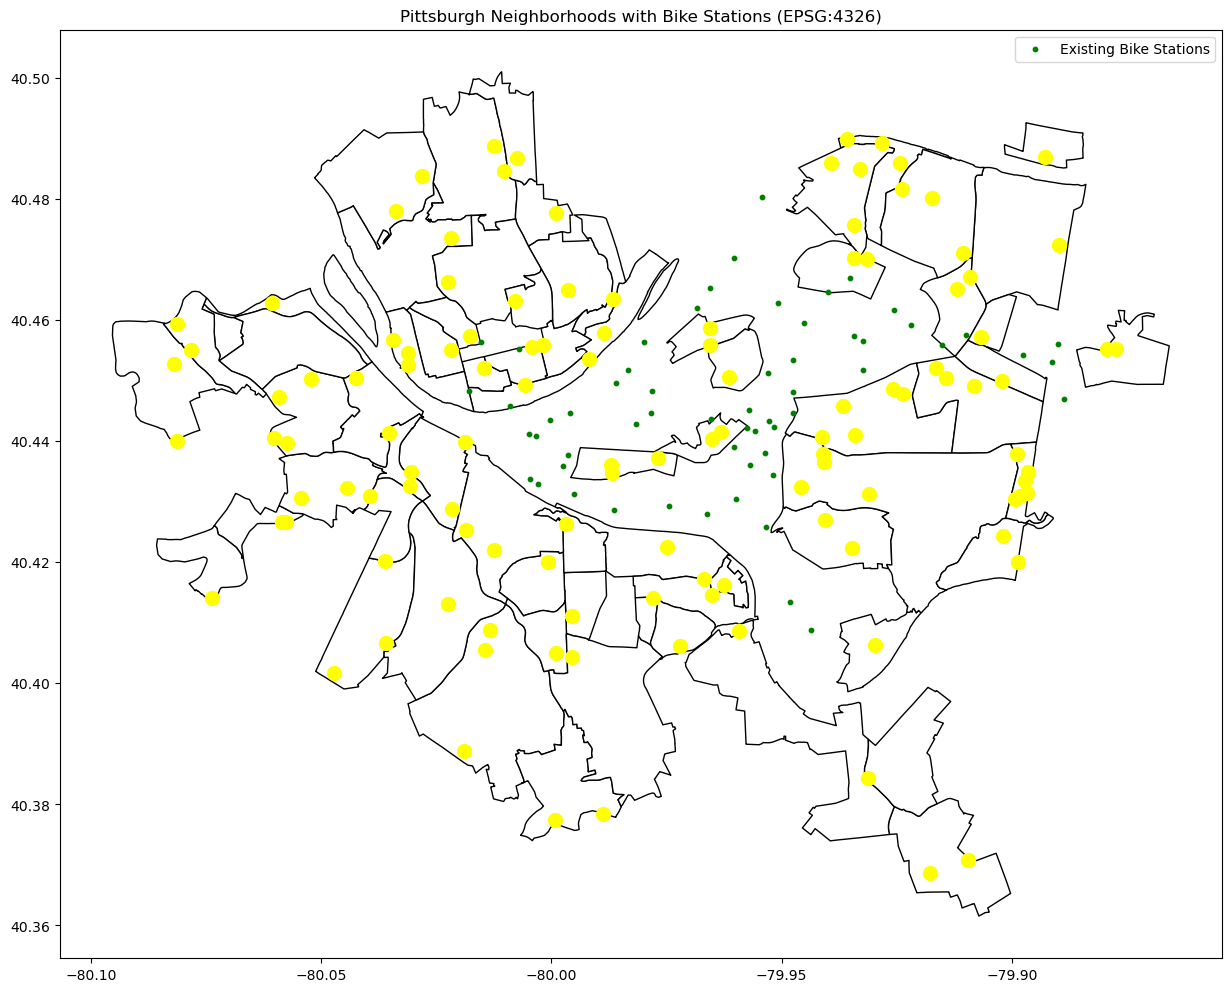

In [189]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import random

def generate_random_points_within_polygon(polygon, num_points):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if random_point.within(polygon):
            points.append(random_point)
    return points

# 加载 Shapefile
gdf = gpd.read_file('pittsburghpaneighborhoods\\Neighborhoods_.shp')

# 将地理数据框的坐标系转换为EPSG:4326
gdf = gdf.to_crs(epsg=4326)

# 加载自行车站点数据
stations = pd.read_excel('pogoh-station-locations-october-2023.xlsx')

# 将经纬度转换为点
geometry = [Point(xy) for xy in zip(stations['Longitude'], stations['Latitude'])]
crs = {'init': 'epsg:4326'} # 使用WGS84坐标系
geo_stations = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)

# 预测的自行车站数量进行四舍五入
predicted_stations = pd.read_csv('predicted_station_count.csv')
predicted_stations['rounded_station_count'] = predicted_stations['predicted_station_count'].round()

# 合并预测数据到社区地图上，使用 'hood' 作为两个数据集中的社区名称列
gdf = gdf.merge(predicted_stations, left_on='hood', right_on='neighborhood')

# 绘制地图
fig, ax = plt.subplots(figsize=(15, 15))
gdf.plot(ax=ax, color='white', edgecolor='black')

# 绘制原有的自行车站
geo_stations.plot(ax=ax, markersize=10, color='green', label='Existing Bike Stations')

# 对每个社区根据预测的数量随机分布绘制预测的自行车站点
for index, row in gdf.iterrows():
    if row['rounded_station_count'] > 0:
        points = generate_random_points_within_polygon(row['geometry'], int(row['rounded_station_count']))
        for point in points:
            ax.plot(point.x, point.y, marker='o', color='yellow', markersize=10)

# 设置图例和标题
ax.legend()
plt.title('Pittsburgh Neighborhoods with Bike Stations (EPSG:4326)')

# 显示图表
plt.show()
